## Метрики классификации

In [46]:
import pandas as pd
import numpy as np


def process(fname):
    df = pd.read_csv(fname)
    df = df.astype({'target': int})
    
    for i in range(1, 10):
        val = i / 10
        df['pred'] = df['prediction'].apply(lambda x: 0 if x < val else 1)
        
        TP = df.loc[(df['target'] == 1) & (df['pred'] == 1)].shape[0]
        FP = df.loc[(df['target'] == 0) & (df['pred'] == 1)].shape[0]
        # TN = df.loc[(df['target'] == 0) & (df['pred'] == 0)].shape[0]
        FN = df.loc[(df['target'] == 1) & (df['pred'] == 0)].shape[0]
        
        # print()
        # print(start, end)
        # print(TP, FP, TN, FN)
        # print(df.head(10))
        
        if TP == 0:
            precision = recall = f1 = 0.0
        else:
            precision = TP / (TP + FP)
            recall = TP / (TP + FN)
            f1 = 2*TP / (2*TP + FN + FP)
        
        print(round(precision, 4), round(recall, 4), round(f1, 4))


if __name__ == '__main__':
    process(input())
    # 0.6616 0.9662 0.7854
    # 0.7337 0.9423 0.825
    # 0.7896 0.9231 0.8512
    # 0.8287 0.8992 0.8625
    # 0.8565 0.88 0.8681
    # 0.8849 0.8514 0.8678
    # 0.9099 0.8234 0.8645
    # 0.9441 0.7879 0.859
    # 0.9799 0.7378 0.8418
    

0.6616 0.9662 0.7854
0.7337 0.9423 0.825
0.7896 0.9231 0.8512
0.8287 0.8992 0.8625
0.8565 0.88 0.8681
0.8849 0.8514 0.8678
0.9099 0.8234 0.8645
0.9441 0.7879 0.859
0.9799 0.7378 0.8418


In [29]:
df = pd.read_csv('classifier_prediction_1.csv')
df['pred'] = np.round(df['prediction'])
df.sort_values(by=['prediction'], ascending=True, inplace=True)
df = df.astype({'target': int, 'pred': int})

df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 4230 to 1808
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   target      5000 non-null   int32  
 1   prediction  5000 non-null   float64
 2   pred        5000 non-null   int32  
dtypes: float64(1), int32(2)
memory usage: 117.2 KB


,target,prediction,pred
4230,0,0.001750,0
960,0,0.001831,0
4206,0,0.002177,0
4593,0,0.002408,0
4380,0,0.002851,0
2945,0,0.002874,0
3336,0,0.002900,0
2194,0,0.002915,0
2259,0,0.002976,0
1904,0,0.002979,0


In [37]:
print(df.loc[df['target'] == 1].shape[0])
print(df.loc[df['target'] == 0].shape[0])

TP = df.loc[(df['target'] == 1) & (df['pred'] == 1)].shape[0]
FP = df.loc[(df['target'] == 0) & (df['pred'] == 1)].shape[0]
TN = df.loc[(df['target'] == 0) & (df['pred'] == 0)].shape[0]
FN = df.loc[(df['target'] == 1) & (df['pred'] == 0)].shape[0]

print(TP, FP, TN, FN)

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2*TP / (2*TP + FN + FP)

print(round(precision, 4), round(recall, 4), round(f1, 4))

1716
3284
1510 253 3031 206
0.8565 0.88 0.8681


0.9670233086036983


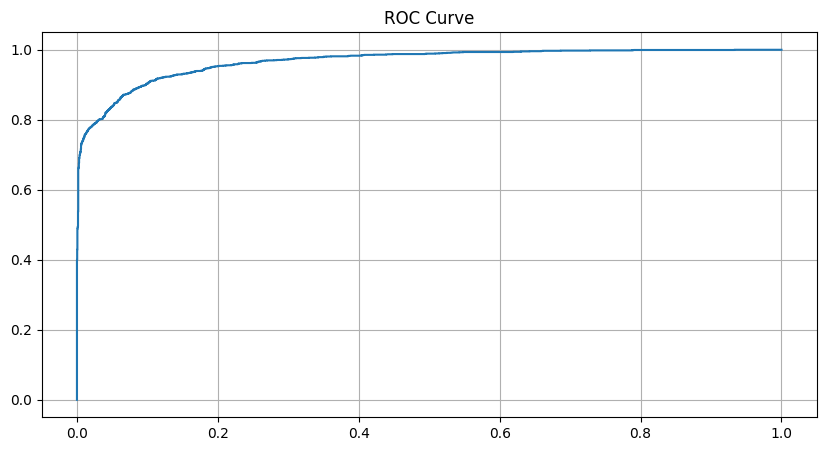

756 756
1 76 0.754079254079254 0.010657734470158343
2 151 0.796037296037296 0.02892813641900122
3 227 0.8397435897435898 0.05115712545676005
4 302 0.8764568764568764 0.07490864799025579
5 378 0.9102564102564102 0.10475030450669914
6 454 0.9358974358974359 0.16321559074299635
7 529 0.9592074592074592 0.22838002436053592
8 605 0.9836829836829837 0.40316686967113274
9 680 0.9953379953379954 0.6306333739342266


In [42]:
import matplotlib.pyplot as plt
from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(y_true=df.target, y_score=df.prediction)
roc_auc = metrics.roc_auc_score(y_true=df.target, y_score=df.prediction)

print(roc_auc)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.grid()
plt.show()

# print(fpr, tpr)
print(len(fpr), len(tpr))
length = len(fpr)

for i in range(1, 10):
    pos = round(length / 10 * i)
    print(i, pos, tpr[pos], fpr[pos])

In [31]:
for i in range(9):
    start, end = i / 10, (i + 1) / 10
    sub_df = df.loc[(start <= df['prediction']) & (df['prediction'] <= end)]
    
    TP = sub_df.loc[(sub_df['target'] == 1) & (sub_df['pred'] == 1)].shape[0]
    FP = sub_df.loc[(sub_df['target'] == 0) & (sub_df['pred'] == 1)].shape[0]
    TN = sub_df.loc[(sub_df['target'] == 0) & (sub_df['pred'] == 0)].shape[0]
    FN = sub_df.loc[(sub_df['target'] == 1) & (sub_df['pred'] == 0)].shape[0]
    
    # print(start, end)
    # print(TP, FP, TN, FN)
    
    if TP == 0:
        precision = recall = f1 = 0.0
    else:
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1 = 2*TP / (2*TP + FN + FP)
    
    print(round(precision, 4), round(recall, 4), round(f1, 4))
    # print(sub_df.head(10))

0.0 0.1
0 0 2436 58
0.0 0.0 0.0
0.1 0.2
0 0 261 41
0.0 0.0 0.0
0.2 0.3
0 0 165 33
0.0 0.0 0.0
0.3 0.4
0 0 103 41
0.0 0.0 0.0
0.4 0.5
0 0 66 33
0.0 0.0 0.0
0.5 0.6
49 63 0 0
0.4375 1.0 0.6087
0.6 0.7
48 50 0 0
0.4898 1.0 0.6575
0.7 0.8
61 60 0 0
0.5041 1.0 0.6703
0.8 0.9
86 54 0 0
0.6143 1.0 0.7611
